### Credit Card Fraud Prediction

#### 1. Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from datetime import date
import datetime as dt


%matplotlib inline
sns.set()
sns.set_palette('rocket')
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### 2. Loading dataset

In [5]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\ML\credit_card_transactions.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.08,-81.18,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01,-82.05,0,28705.00
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.89,-118.21,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.16,-118.19,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18,-112.26,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15,-112.15,0,83236.00
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23,-112.11,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03,-112.56,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42,-79.46,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67,-78.63,0,22844.00


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [12]:
df.shape

(1296675, 24)

In [14]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [16]:
df[df.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode


In [18]:
df.drop(columns={'Unnamed: 0','merch_zipcode'},inplace=True)

In [20]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00
mean,417192042079726656.00,70.35,48800.67,38.54,-90.23,88824.44,1349243636.73,38.54,-90.23,0.01
std,1308806447000240384.00,160.32,26893.22,5.08,13.76,301956.36,12841278.42,5.11,13.77,0.08
min,60416207185.00,1.00,1257.00,20.03,-165.67,23.00,1325376018.00,19.03,-166.67,0.00
25%,180042946491150.00,9.65,26237.00,34.62,-96.80,743.00,1338750742.50,34.73,-96.90,0.00
50%,3521417320836166.00,47.52,48174.00,39.35,-87.48,2456.00,1349249747.00,39.37,-87.44,0.00
75%,4642255475285942.00,83.14,72042.00,41.94,-80.16,20328.00,1359385375.50,41.96,-80.24,0.00
max,4992346398065154048.00,28948.90,99783.00,66.69,-67.95,2906700.00,1371816817.00,67.51,-66.95,1.00


In [22]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [24]:
df.rename(columns={'trans_date_trans_time':'trans_date'},inplace=True)

In [26]:
df['trans_date']=pd.to_datetime(df['trans_date'])
df['dob']=pd.to_datetime(df['dob'])

In [31]:
df.drop(columns={'cc_num','lat','long','trans_num','unix_time','merch_lat','merch_long','zip','last','first'},inplace=True)

In [33]:
df.head()

,trans_date,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0


In [35]:
print(df['merchant'].nunique())
df['merchant'].value_counts()

693


merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [37]:
df['merchant'] = df['merchant'].str.split(',').str[0].str.replace('fraud_', '', regex=False)
df.head()

,trans_date,merchant,category,amt,gender,street,city,state,city_pop,job,dob,is_fraud
0,2019-01-01 00:00:18,Rippin,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,Heller,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,Kutch,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,Dance movement psychotherapist,1986-03-28,0


In [45]:
df['merchant_short'].nunique()

648

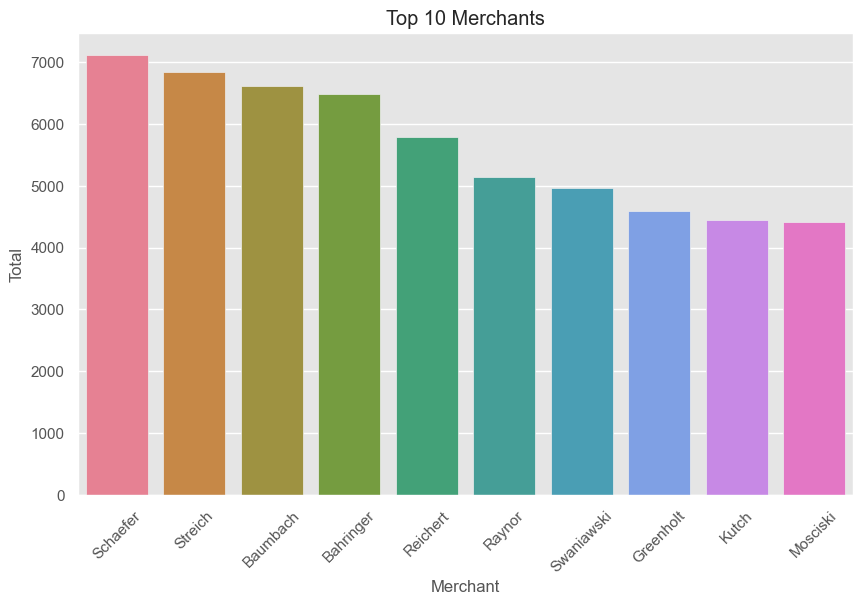

In [39]:
merchant_top10=df.groupby('merchant')['merchant'].size().reset_index(name='total')
merchant_top10=merchant_top10.sort_values(by='total',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=merchant_top10,x='merchant',y='total',hue='merchant')
plt.title('Top 10 Merchants')
plt.xlabel('Merchant')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [41]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

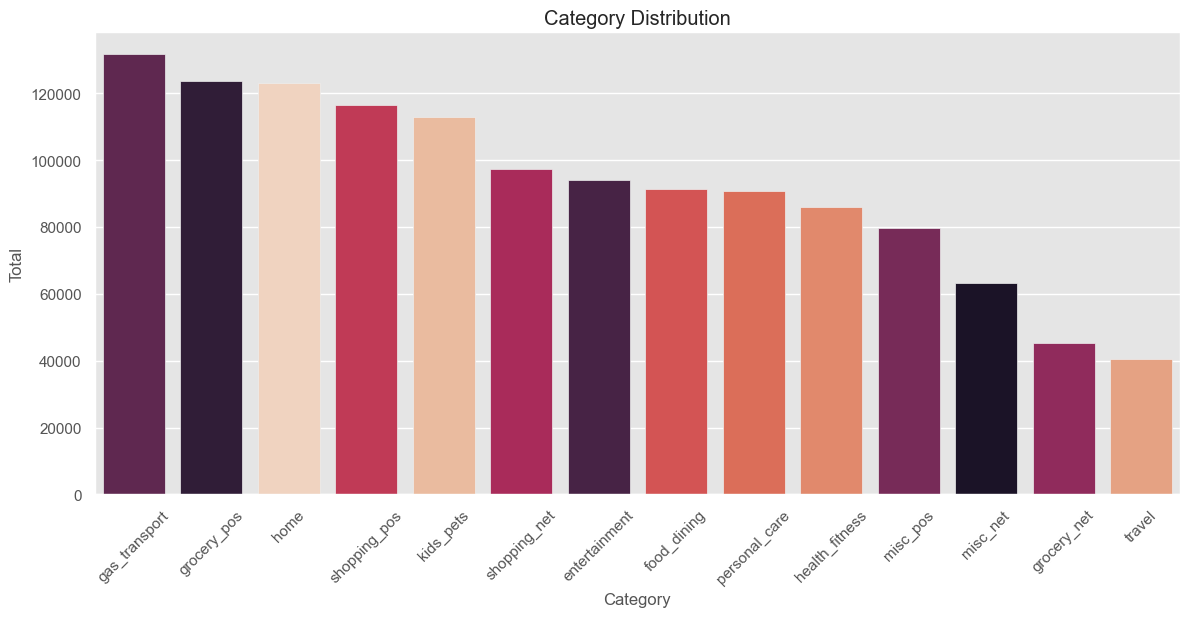

In [43]:
order=df['category'].value_counts().index
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='category',hue='category',palette='rocket',order=order)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [45]:
df.drop('job',axis=1,inplace=True)

In [47]:
df['city'].value_counts()

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Vacaville         7
Claypool          7
Karns City        7
Bruce             7
Chattanooga       7
Name: count, Length: 894, dtype: int64

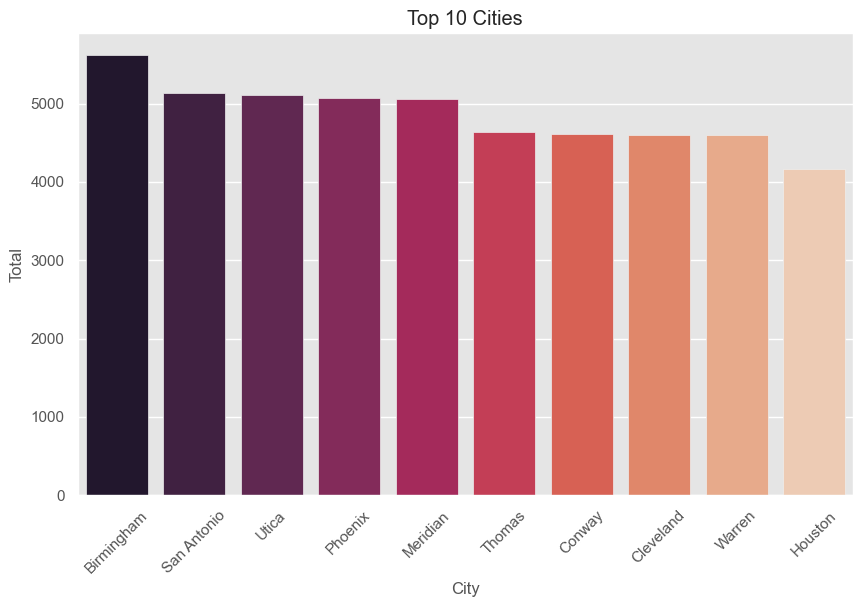

In [49]:
cities_top10=df.groupby('city')['city'].size().reset_index(name='total')
cities_top10=cities_top10.sort_values(by='total',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=cities_top10,x='city',y='total',hue='city',palette='rocket')
plt.title('Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [51]:
df['state'].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

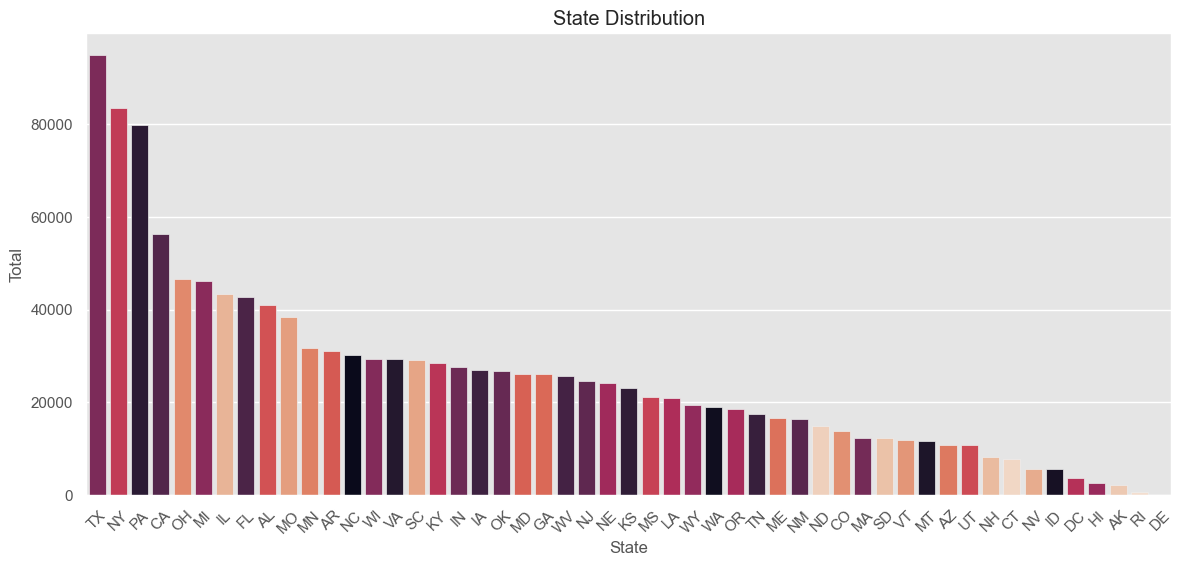

In [53]:
order=df['state'].value_counts().index
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='state',hue='state',palette='rocket',order=order)
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [55]:
df.head()

,trans_date,merchant,category,amt,gender,street,city,state,city_pop,dob,is_fraud
0,2019-01-01 00:00:18,Rippin,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,3495,1988-03-09,0
1,2019-01-01 00:00:44,Heller,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,149,1978-06-21,0
2,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,4154,1962-01-19,0
3,2019-01-01 00:01:16,Kutch,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,1939,1967-01-12,0
4,2019-01-01 00:03:06,Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,99,1986-03-28,0


In [57]:
df.drop('dob',axis=1,inplace=True)

In [59]:
df['gender'].replace({'F':'Female','M':'Male'},inplace=True)

C:\Users\dorot\AppData\Local\Temp\ipykernel_9672\597829900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F':'Female','M':'Male'},inplace=True)


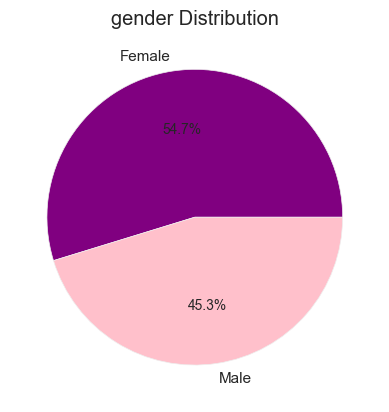

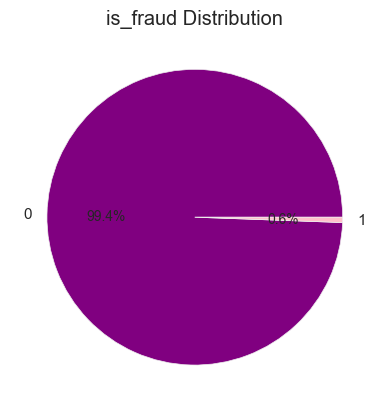

In [61]:
cols=['gender','is_fraud']
for col in cols:
    grouped=df.groupby(col)[col].size().reset_index(name='total')
    plt.pie(grouped['total'],labels=grouped[col],autopct="%1.1f%%",colors=['purple','pink'])
    plt.title(f'{col} Distribution')
    plt.show()

In [63]:
df['hour'] = df['trans_date'].dt.hour            
df['day'] = df['trans_date'].dt.day              
df['weekday'] = df['trans_date'].dt.weekday      
df.head()


,trans_date,merchant,category,amt,gender,street,city,state,city_pop,is_fraud,hour,day,weekday
0,2019-01-01 00:00:18,Rippin,misc_net,4.97,Female,561 Perry Cove,Moravian Falls,NC,3495,0,0,1,1
1,2019-01-01 00:00:44,Heller,grocery_pos,107.23,Female,43039 Riley Greens Suite 393,Orient,WA,149,0,0,1,1
2,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Male,594 White Dale Suite 530,Malad City,ID,4154,0,0,1,1
3,2019-01-01 00:01:16,Kutch,gas_transport,45.00,Male,9443 Cynthia Court Apt. 038,Boulder,MT,1939,0,0,1,1
4,2019-01-01 00:03:06,Keeling-Crist,misc_pos,41.96,Male,408 Bradley Rest,Doe Hill,VA,99,0,0,1,1


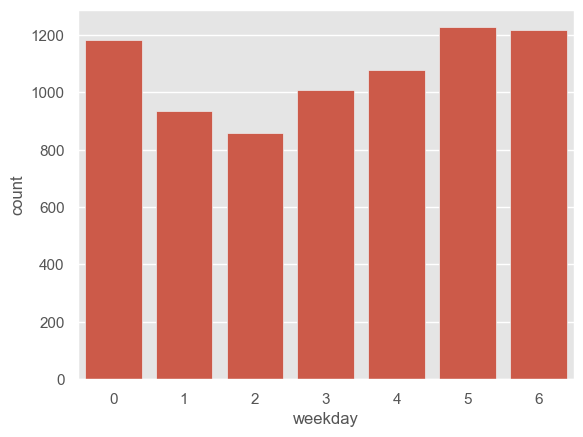

In [65]:
is_fraud=df[df['is_fraud']==1]
sns.countplot(data=is_fraud,x='weekday')
plt.show()

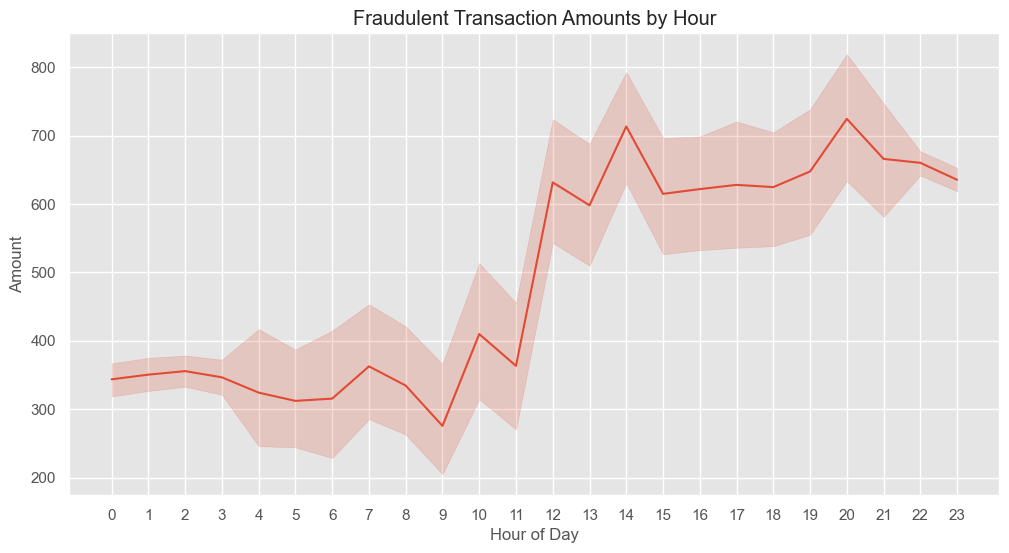

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(x='hour',y='amt',data=is_fraud)
plt.xticks(ticks=range(0, 24))
plt.xlabel("Hour of Day")
plt.ylabel("Amount")
plt.title("Fraudulent Transaction Amounts by Hour")
plt.show()

In [73]:
df.drop('trans_date',axis=1,inplace=True)

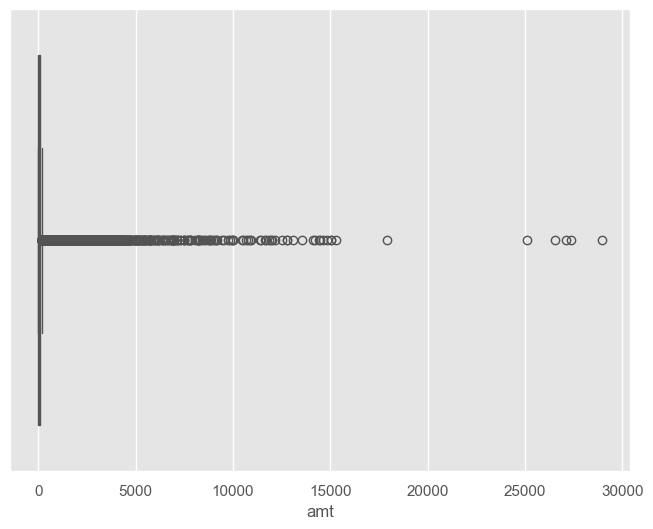

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='amt')
plt.show()

In [83]:
percentile25=df['amt'].quantile(0.25)
percentile75=df['amt'].quantile(0.75)
IQR=percentile75-percentile25
upper_limit=percentile75+1.5*IQR

df=df[df['amt']<=upper_limit]
df.reset_index(drop=True,inplace=True)

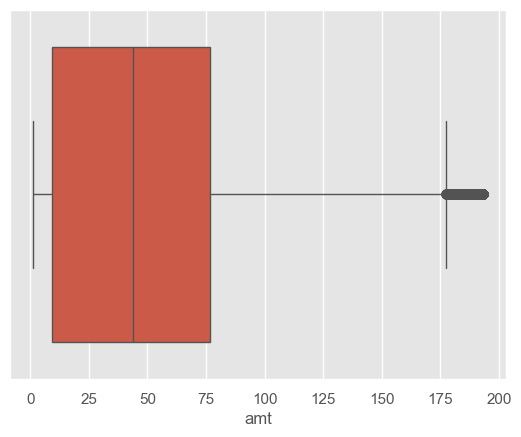

In [85]:
sns.boxplot(data=df,x='amt')
plt.show()

In [87]:
df['is_fraud'].value_counts()

is_fraud
0    1227584
1       1801
Name: count, dtype: int64

In [89]:
df.head()

,merchant,category,amt,gender,street,city,state,city_pop,is_fraud,hour,day,weekday
0,Rippin,misc_net,4.97,Female,561 Perry Cove,Moravian Falls,NC,3495,0,0,1,1
1,Heller,grocery_pos,107.23,Female,43039 Riley Greens Suite 393,Orient,WA,149,0,0,1,1
2,Kutch,gas_transport,45.00,Male,9443 Cynthia Court Apt. 038,Boulder,MT,1939,0,0,1,1
3,Keeling-Crist,misc_pos,41.96,Male,408 Bradley Rest,Doe Hill,VA,99,0,0,1,1
4,Stroman,gas_transport,94.63,Female,4655 David Island,Dublin,PA,2158,0,0,1,1


In [91]:
le=LabelEncoder()
cols=['merchant','city','category','state','gender','street']
for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()


,merchant,category,amt,gender,street,city,state,city_pop,is_fraud,hour,day,weekday
0,486,8,4.97,0,561,522,27,3495,0,0,1,1
1,226,4,107.23,0,431,606,47,149,0,0,1,1
2,339,2,45.00,1,918,83,26,1939,0,0,1,1
3,282,9,41.96,1,414,213,45,99,0,0,1,1
4,569,2,94.63,0,467,220,38,2158,0,0,1,1


In [317]:
ohe=OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded=ohe.fit_transform(df2[['category']])
one_hot_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['category']))
df_encoded = pd.concat([df2.drop('category', axis=1), one_hot_df], axis=1)
df_encoded.head()

,amount,gender,city,state,job,is_fraud,Age,merchant_short,hour,day,weekday,month,part_of_day,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,1.00,521.00,27.00,368.00,0.00,37.00,486.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1,107.23,1.00,605.00,47.00,424.00,0.00,47.00,226.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,45.00,0.00,83.00,26.00,326.00,0.00,58.00,339.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,41.96,0.00,213.00,45.00,114.00,0.00,39.00,282.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,94.63,1.00,220.00,38.00,475.00,0.00,64.00,569.00,0.00,1.00,1.00,1.00,3.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


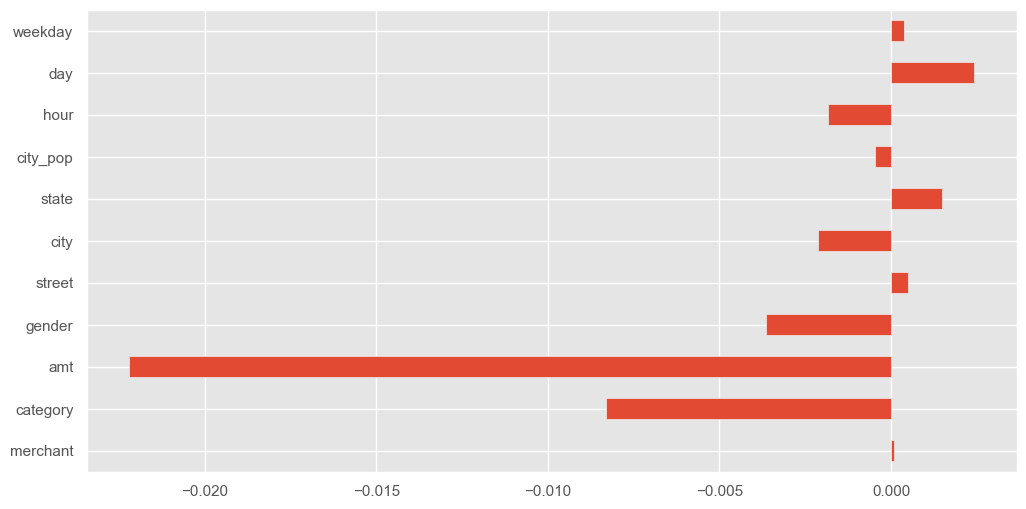

In [93]:
correlation_values = df.corr()['is_fraud'].drop('is_fraud')
correlation_values.plot(kind='barh', figsize=(12, 6))
plt.show()

In [95]:
df.drop('merchant',axis=1,inplace=True)

In [135]:
df.is_fraud.value_counts()

is_fraud
0    1227584
1       1801
Name: count, dtype: int64

In [137]:
fraud = df[df['is_fraud'] == 1]
not_fraud =df[df['is_fraud'] == 0]

not_fraud = not_fraud.sample(n=2000, random_state=42)

# Concatenate the downsampled data
data = pd.concat([fraud, not_fraud])
data.head()

,category,amt,gender,street,city,state,city_pop,is_fraud,hour,day,weekday
2348,2,11.52,0,278,718,43,1595797,1,1,2,2
2417,2,7.03,1,538,162,27,885,1,3,2,2
3407,2,10.76,0,278,718,43,1595797,1,1,3,3
4471,13,4.50,0,677,470,38,1472,1,22,3,3
4580,3,14.37,1,840,825,0,145,1,0,4,4


In [139]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [141]:
scaler=StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
from sklearn.utils.class_weight import compute_sample_weight
w_train = compute_sample_weight('balanced', y_train)

Accuracy: 70.3
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       400
           1       0.68      0.69      0.69       361

    accuracy                           0.70       761
   macro avg       0.70      0.70      0.70       761
weighted avg       0.70      0.70      0.70       761



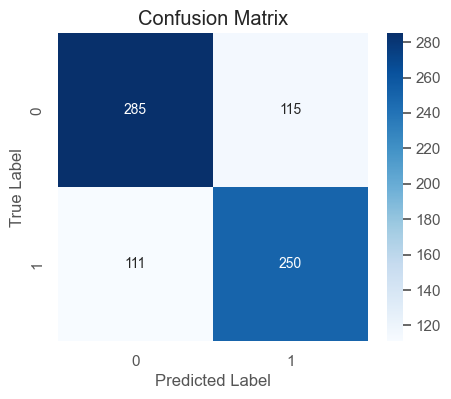

In [143]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [145]:
param_grid = [{
    'splitter':['best','random'],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

dtc=DecisionTreeClassifier()

grid_search=GridSearchCV(dtc,param_grid,cv=3,scoring='accuracy', n_jobs=-1)  
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9345412984261796
{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 12, 'splitter': 'best'}


Accuracy: 95.66
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.95      0.96      0.95       361

    accuracy                           0.96       761
   macro avg       0.96      0.96      0.96       761
weighted avg       0.96      0.96      0.96       761



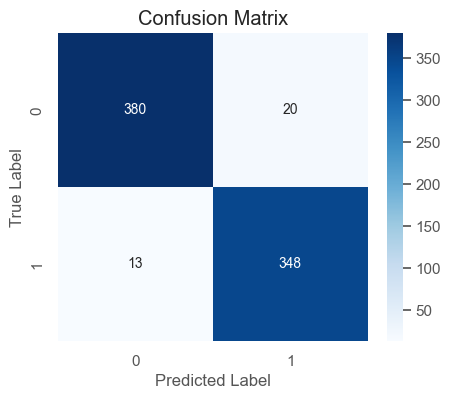

In [147]:
dtc=DecisionTreeClassifier(class_weight= {0: 1, 1: 2}, criterion= 'gini', max_depth= 12, min_samples_split= 12, splitter= 'best')
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()